In [23]:
#!pip install plotly 
#!pip install bqplot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go
from bokeh.charts import Histogram
from scipy import *
import pylab
from bqplot import *


# Read dataset
#dateparse = lambda dates: pd.datetime.strptime('2012-01-01 08:34:00', '%Y-%m-%d %H:%M:%S')
#df=pd.read_csv('ecommerce-data.csv',encoding='latin1',parse_dates=['InvoiceDate'],date_parser=dateparse)
df=pd.read_csv('ecommerce-data.csv',encoding='latin1',parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
#Create computed year and month dimension    #? why dt work
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Sales']= df['InvoiceDate'].dt.year
df['Month']= df['InvoiceDate'].dt.month # Here check
df['Sales'] =df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012


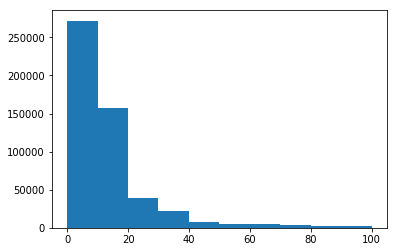

In [25]:
# check the sale distribution

#df = df[df['StockCode'].str.contains("71053","84406B")]
df = df.loc[df['Sales'] > 0 ]
df = df.loc[df['Sales'] < 100]

#sales = df[['StockCode','Sales']]
#sales = sales.groupby(['StockCode']).sum()
sales = df['Sales']
plt.hist(sales) 
plt.show()
#print (sales.groupby(['StockCode']).sum())
# may be outlier

d:\Users\L\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



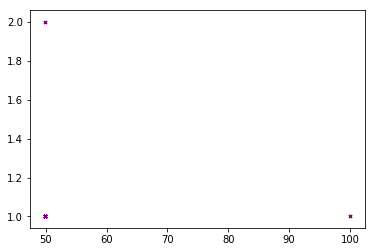

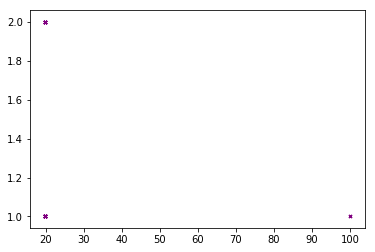

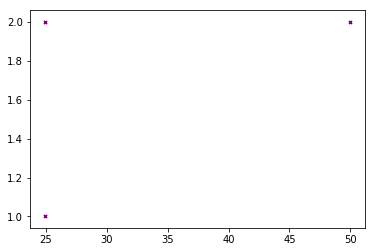

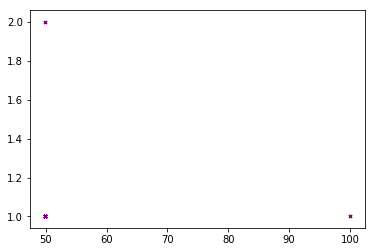

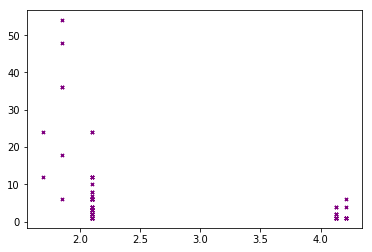

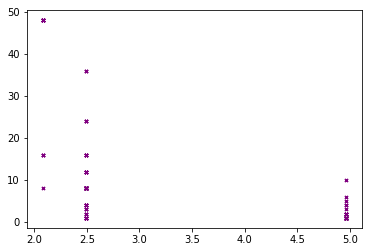

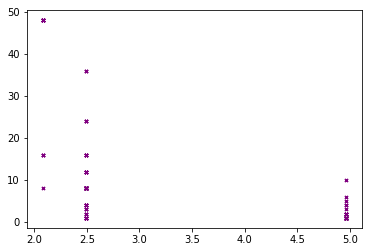

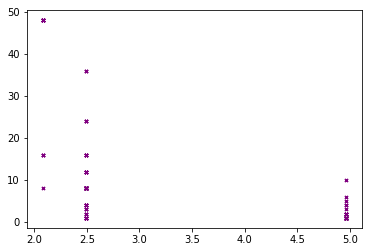

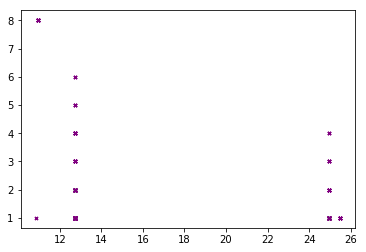

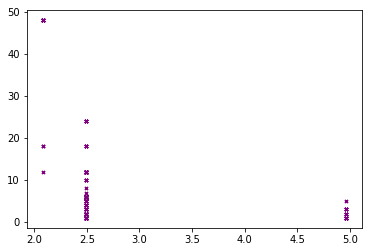

In [36]:
#Top 10 product plot unit vs price
# Should be by product

#for i in df['StockCode']:


#Define weighted mean
wm = lambda x: np.average(x, weights=df.loc[x.index, "Sales"])
f = {'Sales': ['sum'], 'UnitPrice': {'weighted_mean' : wm},
     'Quantity':{'weighted_mean': wm}
    
    }
sales = df.groupby(by='StockCode').agg(f)
sales.head()



salessort = df[['StockCode','Sales']]
salessort = salessort.sort_values('Sales',ascending=False)
salessort = salessort['StockCode'][0:10]
salessort

for i in salessort:
    Stock=df[df['StockCode'].str.contains(i)]
    plt.scatter(x = Stock['UnitPrice'], y = Stock['Quantity'],
    color = 'purple',
    marker = 'x', 
    s = 10
  #  title = 'Product Code :'     got error AttributeError: Unknown property title
    )
    plt.show()

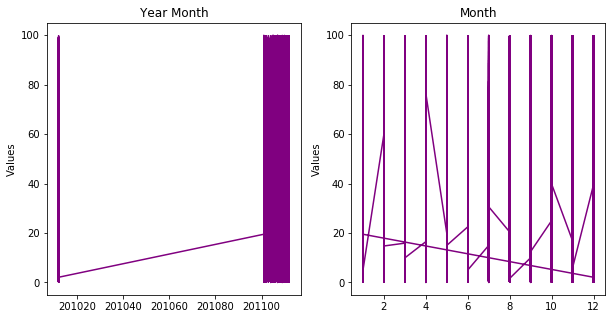

In [38]:
#Time series

#sales = sales.groupby(['StockCode']).Sales.sum()
sales = df.groupby(['StockCode']).Sales.sum()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['YearMonth'],df['Sales'], color='purple')
plt.ylabel('Values')
plt.title('Year Month')

plt.subplot(1 ,2, 2)
plt.plot(df['Month'],df['Sales'], color='purple')
plt.ylabel('Values')
plt.title('Month')
plt.show()


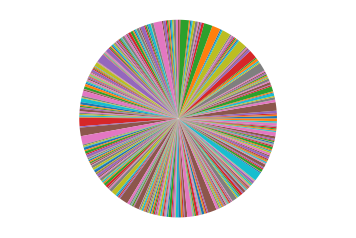

In [52]:
# top 10 pie chart
labels = []
for i in salessort:
    labels.append(i)
    Stocklist=df[df['StockCode'].str.contains(i)]
    sizes =  Stocklist['Sales']
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice

sizes
#Plot  colors=colors, labels=labels,explode=explode,    autopct='%1.1f%%', shadow=True, startangle=140
plt.pie(sizes )
 
plt.axis('equal')
plt.show()
 

In [101]:
df.to_csv('test.csv', sep=',')